In [108]:
import duckdb
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

Task 1 - EDA in python

In [136]:
# duckdb database path
duckdb_path = "data/sakila.duckdb"      # sets the path for the DuckDB database file
Path(duckdb_path).unlink(missing_ok=True)  # deletes the duckdb file if it already exists

# Ingest Sakila dataset into DuckDB
with duckdb.connect(duckdb_path) as conn, open("sql/load_sakila.sql") as ingest_scripts:  # opens a Duckdb connection and the SQL script file
    conn.sql(ingest_scripts.read()) # 

    description = conn.sql("DESC;").df()  # retrieves the description of the current database schema as a DataFrame
 
    film = conn.sql("FROM film;").df() 
    rental = conn.sql("FROM rental;").df() 
    inventory = conn.sql("FROM inventory;").df() 
    
film.head()


,film_id,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update
0,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,<NA>,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",2021-03-06 15:52:00
1,2,ACE GOLDFINGER,A Astounding Epistle of a Database Administrat...,2006,1,<NA>,3,4.99,48,12.99,G,"Trailers,Deleted Scenes",2021-03-06 15:52:00
2,3,ADAPTATION HOLES,A Astounding Reflection of a Lumberjack And a ...,2006,1,<NA>,7,2.99,50,18.99,NC-17,"Trailers,Deleted Scenes",2021-03-06 15:52:00
3,4,AFFAIR PREJUDICE,A Fanciful Documentary of a Frisbee And a Lumb...,2006,1,<NA>,5,2.99,117,26.99,G,"Commentaries,Behind the Scenes",2021-03-06 15:52:00
4,5,AFRICAN EGG,A Fast-Paced Documentary of a Pastry Chef And ...,2006,1,<NA>,6,2.99,130,22.99,G,Deleted Scenes,2021-03-06 15:52:00


In [131]:
description

,database,schema,name,column_names,column_types,temporary
0,sakila,main,actor,"[actor_id, first_name, last_name, last_update]","[DOUBLE, VARCHAR, VARCHAR, TIMESTAMP]",False
1,sakila,main,address,"[address_id, address, address2, district, city...","[BIGINT, VARCHAR, VARCHAR, VARCHAR, BIGINT, VA...",False
2,sakila,main,category,"[category_id, name, last_update]","[BIGINT, VARCHAR, TIMESTAMP]",False
3,sakila,main,city,"[city_id, city, country_id, last_update]","[BIGINT, VARCHAR, BIGINT, TIMESTAMP]",False
4,sakila,main,country,"[country_id, country, last_update]","[BIGINT, VARCHAR, TIMESTAMP]",False
5,sakila,main,customer,"[customer_id, store_id, first_name, last_name,...","[BIGINT, BIGINT, VARCHAR, VARCHAR, VARCHAR, BI...",False
6,sakila,main,customer_list,"[ID, name, address, zip_code, phone, city, cou...","[BIGINT, VARCHAR, VARCHAR, VARCHAR, VARCHAR, V...",False
7,sakila,main,film,"[film_id, title, description, release_year, la...","[BIGINT, VARCHAR, VARCHAR, VARCHAR, BIGINT, BI...",False
8,sakila,main,film_actor,"[actor_id, film_id, last_update]","[BIGINT, BIGINT, TIMESTAMP]",False
9,sakila,main,film_category,"[film_id, category_id, last_update]","[BIGINT, BIGINT, TIMESTAMP]",False


# Read alla data into dictionary of pandas dataframes

In [110]:
dfs = {}

with duckdb.connect(duckdb_path)as conn:
    for name in description["name"]:
        dfs[name] = conn.sql(f"FROM {name};").df()

dfs.keys()

dict_keys(['actor', 'address', 'category', 'city', 'country', 'customer', 'customer_list', 'film', 'film_actor', 'film_category', 'film_list', 'film_text', 'inventory', 'language', 'payment', 'rental', 'sales_by_film_category', 'sales_by_store', 'staff', 'staff_list', 'store'])

a) Which movies are longer than 3 hours (180 minutes), show the title and its length?

In [111]:
# film longer than 3 hours
film_long = duckdb.sql("""
    SELECT title, length, description, rating
    FROM film
    WHERE length > 180
""").df()
film_long.head()

,title,length,description,rating
0,ANALYZE HOOSIERS,181,A Thoughtful Display of a Explorer And a Pastr...,R
1,BAKED CLEOPATRA,182,A Stunning Drama of a Forensic Psychologist An...,G
2,CATCH AMISTAD,183,A Boring Reflection of a Lumberjack And a Femi...,G
3,CHICAGO NORTH,185,A Fateful Yarn of a Mad Cow And a Waitress who...,PG-13
4,CONSPIRACY SPIRIT,184,A Awe-Inspiring Story of a Student And a Frisb...,PG-13


In [112]:
len(film_long)

39

In [113]:

# Count the number of films in the film table
duckdb.sql( """SELECT * FROM film """).df()

,film_id,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update
0,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,<NA>,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",2021-03-06 15:52:00
1,2,ACE GOLDFINGER,A Astounding Epistle of a Database Administrat...,2006,1,<NA>,3,4.99,48,12.99,G,"Trailers,Deleted Scenes",2021-03-06 15:52:00
2,3,ADAPTATION HOLES,A Astounding Reflection of a Lumberjack And a ...,2006,1,<NA>,7,2.99,50,18.99,NC-17,"Trailers,Deleted Scenes",2021-03-06 15:52:00
3,4,AFFAIR PREJUDICE,A Fanciful Documentary of a Frisbee And a Lumb...,2006,1,<NA>,5,2.99,117,26.99,G,"Commentaries,Behind the Scenes",2021-03-06 15:52:00
4,5,AFRICAN EGG,A Fast-Paced Documentary of a Pastry Chef And ...,2006,1,<NA>,6,2.99,130,22.99,G,Deleted Scenes,2021-03-06 15:52:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,YOUNG LANGUAGE,A Unbelieveable Yarn of a Boat And a Database ...,2006,1,<NA>,6,0.99,183,9.99,G,"Trailers,Behind the Scenes",2021-03-06 15:52:08
996,997,YOUTH KICK,A Touching Drama of a Teacher And a Cat who mu...,2006,1,<NA>,4,0.99,179,14.99,NC-17,"Trailers,Behind the Scenes",2021-03-06 15:52:08
997,998,ZHIVAGO CORE,A Fateful Yarn of a Composer And a Man who mus...,2006,1,<NA>,6,0.99,105,10.99,NC-17,Deleted Scenes,2021-03-06 15:52:08
998,999,ZOOLANDER FICTION,A Fateful Reflection of a Waitress And a Boat ...,2006,1,<NA>,5,2.99,101,28.99,R,"Trailers,Deleted Scenes",2021-03-06 15:52:08


b) Which movies have the word "love" in its title? Show the following columns
title
rating
length
description

In [114]:

duckdb.sql("""
            SELECT 
                title,
                rating,
                length,
                description
            FROM film
            WHERE lower (title) LIKE '%love%';
        """).df()

,title,rating,length,description
0,GRAFFITI LOVE,PG,117,A Unbelieveable Epistle of a Sumo Wrestler And...
1,IDAHO LOVE,PG-13,172,A Fast-Paced Drama of a Student And a Crocodil...
2,IDENTITY LOVER,PG-13,119,A Boring Tale of a Composer And a Mad Cow who ...
3,INDIAN LOVE,NC-17,135,A Insightful Saga of a Mad Scientist And a Mad...
4,LAWRENCE LOVE,NC-17,175,A Fanciful Yarn of a Database Administrator An...
5,LOVE SUICIDES,R,181,A Brilliant Panorama of a Hunter And a Explore...
6,LOVELY JINGLE,PG,65,A Fanciful Yarn of a Crocodile And a Forensic ...
7,LOVER TRUMAN,G,75,A Emotional Yarn of a Robot And a Boy who must...
8,LOVERBOY ATTACKS,PG-13,162,A Boring Story of a Car And a Butler who must ...
9,STRANGELOVE DESIRE,NC-17,103,A Awe-Inspiring Panorama of a Lumberjack And a...


c) Calculate descriptive statistics on the length column, The Manager wants, shortest, average, median and longest movie length

In [115]:
length_statistics = duckdb.sql("""
    SELECT
        MIN(length) AS shortest_length,
        ROUND(AVG(length)) AS average_length,
        MEDIAN(length) AS median_length,
        MAX(length) AS longest_length
    FROM film
""").df()

length_statistics.head()


,shortest_length,average_length,median_length,longest_length
0,46,115.0,114.0,185


d) The 10 most expensive movies to rent per day.

In [116]:

most_expensive_rentals = duckdb.sql(""" 
    SELECT title, 
            rental_rate, 
            rental_duration,
            (rental_rate / rental_duration) AS cost_per_day 
    FROM film
    ORDER BY cost_per_day ASC 
    LIMIT 10
""").df() 

most_expensive_rentals.head()

,title,rental_rate,rental_duration,cost_per_day
0,ANONYMOUS HUMAN,0.99,7,0.141429
1,BOONDOCK BALLROOM,0.99,7,0.141429
2,CANYON STOCK,0.99,7,0.141429
3,BRIDE INTRIGUE,0.99,7,0.141429
4,BORROWERS BEDAZZLED,0.99,7,0.141429


In [117]:
duckdb.sql(""" 
    SELECT title, 
            rental_rate, 
            rental_duration,
            (rental_rate / rental_duration) AS cost_per_day 
    FROM film
    ORDER BY cost_per_day ASC 
    LIMIT 10
""").df() 


,title,rental_rate,rental_duration,cost_per_day
0,ANONYMOUS HUMAN,0.99,7,0.141429
1,BOONDOCK BALLROOM,0.99,7,0.141429
2,CANYON STOCK,0.99,7,0.141429
3,BRIDE INTRIGUE,0.99,7,0.141429
4,BORROWERS BEDAZZLED,0.99,7,0.141429
5,CATCH AMISTAD,0.99,7,0.141429
6,CARRIE BUNCH,0.99,7,0.141429
7,CELEBRITY HORN,0.99,7,0.141429
8,ARGONAUTS TOWN,0.99,7,0.141429
9,CHRISTMAS MOONSHINE,0.99,7,0.141429


e) The top 10 actors with the number of movies they have
played in.

In [118]:

dfs["actor"].info() # information about the actor dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   actor_id     200 non-null    float64       
 1   first_name   200 non-null    object        
 2   last_name    200 non-null    object        
 3   last_update  200 non-null    datetime64[us]
dtypes: datetime64[us](1), float64(1), object(2)
memory usage: 6.4+ KB


In [119]:
dfs["actor"].head() 

,actor_id,first_name,last_name,last_update
0,1.0,PENELOPE,GUINESS,2021-03-06 15:51:59
1,2.0,NICK,WAHLBERG,2021-03-06 15:51:59
2,3.0,ED,CHASE,2021-03-06 15:51:59
3,4.0,JENNIFER,DAVIS,2021-03-06 15:51:59
4,5.0,JOHNNY,LOLLOBRIGIDA,2021-03-06 15:51:59


In [120]:
len(dfs["actor"]) # 200 actors

200

In [121]:
duckdb.sql("""
    SELECT 
        a.actor_id,
        a.first_name || ' ' || a.last_name AS actor_name,
        COUNT(fa.film_id) AS num_film
    FROM actor a
    JOIN film_actor fa ON a.actor_id = fa.actor_id
    GROUP BY a.actor_id, actor_name
    ORDER BY num_film DESC
    limit 10;
    

""").df()



,actor_id,actor_name,num_film
0,107.0,GINA DEGENERES,42
1,102.0,WALTER TORN,41
2,198.0,MARY KEITEL,40
3,181.0,MATTHEW CARREY,39
4,23.0,SANDRA KILMER,37
5,81.0,SCARLETT DAMON,36
6,13.0,UMA WOOD,35
7,37.0,VAL BOLGER,35
8,60.0,HENRY BERRY,35
9,106.0,GROUCHO DUNST,35


# F) Write down 3-5 questions

1. What are the 5 longest movies

In [122]:
longest_films = duckdb.sql("""
    SELECT title, length
    FROM film
    ORDER BY length DESC 
    LIMIT 5
""").df()

longest_films

,title,length
0,CONTROL ANTHEM,185
1,DARN FORRESTER,185
2,CHICAGO NORTH,185
3,GANGS PRIDE,185
4,HOME PITY,185


2. Which movies have title that start with the letter A

In [123]:
film_a = duckdb.sql("""
    SELECT title
    FROM film
    Where title LIKE 'A%'
    order BY title ASC
""").df()

film_a

,title
0,ACADEMY DINOSAUR
1,ACE GOLDFINGER
2,ADAPTATION HOLES
3,AFFAIR PREJUDICE
4,AFRICAN EGG
5,AGENT TRUMAN
6,AIRPLANE SIERRA
7,AIRPORT POLLOCK
8,ALABAMA DEVIL
9,ALADDIN CALENDAR


In [124]:
description.head()

,database,schema,name,column_names,column_types,temporary
0,sakila,main,actor,"[actor_id, first_name, last_name, last_update]","[DOUBLE, VARCHAR, VARCHAR, TIMESTAMP]",False
1,sakila,main,address,"[address_id, address, address2, district, city...","[BIGINT, VARCHAR, VARCHAR, VARCHAR, BIGINT, VA...",False
2,sakila,main,category,"[category_id, name, last_update]","[BIGINT, VARCHAR, TIMESTAMP]",False
3,sakila,main,city,"[city_id, city, country_id, last_update]","[BIGINT, VARCHAR, BIGINT, TIMESTAMP]",False
4,sakila,main,country,"[country_id, country, last_update]","[BIGINT, VARCHAR, TIMESTAMP]",False


3. Which film categories have the most films?

In [125]:
film_category

,film_id,category_id,last_update
0,1,6,2021-03-06 15:53:28
1,2,11,2021-03-06 15:53:28
2,3,6,2021-03-06 15:53:28
3,4,11,2021-03-06 15:53:28
4,5,8,2021-03-06 15:53:28
...,...,...,...
995,996,6,2021-03-06 15:53:36
996,997,12,2021-03-06 15:53:36
997,998,11,2021-03-06 15:53:36
998,999,3,2021-03-06 15:53:36


In [126]:
duckdb.sql("""
    SELECT 
        category.name AS category,
        COUNT(film.film_id) AS num_films
    FROM film
    JOIN film_category ON film.film_id = film_category.film_id
    JOIN category ON film_category.category_id = category.category_id
    GROUP BY category.name
    ORDER BY num_films DESC
""").df()


,category,num_films
0,Sports,74
1,Foreign,73
2,Family,69
3,Documentary,68
4,Animation,66
5,Action,64
6,New,63
7,Drama,62
8,Games,61
9,Sci-Fi,61


# Graphs

a) Top 5 customers by total spend

In [127]:

top_customers = duckdb.sql("""
        SELECT
            customer.first_name || ' ' || customer.last_name AS customer_name,
            SUM(payment.amount) AS total_spend

        FROM customer
        join payment ON customer.customer_id = payment.customer_id 
        GROUP BY customer.customer_id, customer_name 
        ORDER BY total_spend DESC
        LIMIT 5;

""").df()
top_customers


,customer_name,total_spend
0,KARL SEAL,221.55
1,ELEANOR HUNT,216.54
2,CLARA SHAW,195.58
3,RHONDA KENNEDY,194.61
4,MARION SNYDER,194.61


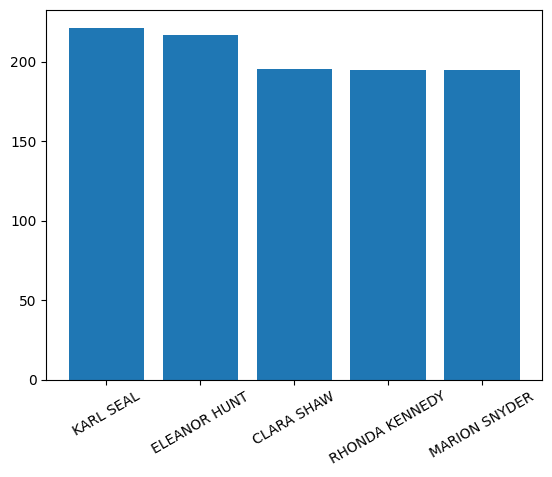

In [128]:
plt.bar(top_customers['customer_name'], top_customers['total_spend'])
plt.xlabel = "Customer",
plt.ylabel = "Total Spend",
plt.title = "Top 5 Customers by Total Spend",
ylim = (300,400),
plt.xticks(rotation=30)
plt.show()




b) The money each film category brings in

In [ ]:
# The money each film category brings in
total_revenue = duckdb.sql("""
    SELECT 
        category.name AS category_name,
        SUM(payment.amount) AS total_revenue

    FROM payment 

    JOIN rental ON payment.rental_id = rental.rental_id
    JOIN inventory ON rental.inventory_id = inventory.inventory_id
    JOIN film ON inventory.film_id = film.film_id
    JOIN film_category ON film.film_id = film_category.film_id
    JOIN category ON film_category.category_id = category.category_id

    GROUP BY category.name
    ORDER BY total_revenue DESC; 
    

   
""").df()

total_revenue

,category_name,total_revenue
0,Sports,5314.21
1,Sci-Fi,4756.98
2,Animation,4656.30
3,Drama,4587.39
4,Comedy,4383.58
5,Action,4375.85
6,New,4351.62
7,Games,4281.33
8,Foreign,4270.67
9,Family,4226.07


In [ ]:
ax = total_revenue.plot(
    kind="barh", x="Category_name", y="Total_Revenue", title="The money each film category brings in")
#ax.set_xlable("Total Revenue")
#ax.set_ylable("film category")

#plt.title = "The money each film category brings in",
#ylim = (300,400),
#plt.xticks(rotation=30)
#plt.show()

ax.invert_yaxis()

KeyError: 'Category_name'